# Jendela


Bagaimana kita merancang fungsi Window untuk mendapatkan redaman stopband yang lebih tinggi? Ada 2 versi, untuk windows yang panjangnya genap dan ganjil . Kami sekarang menganalisis beberapa tipe jendela umum.

Mari kita mulai lagi dengan jendela persegi panjang .  H(n) = 1, untuk n=0,...,L-1.

Dengan Python kita mendapatkan respons frekuensinya untuk L=16:

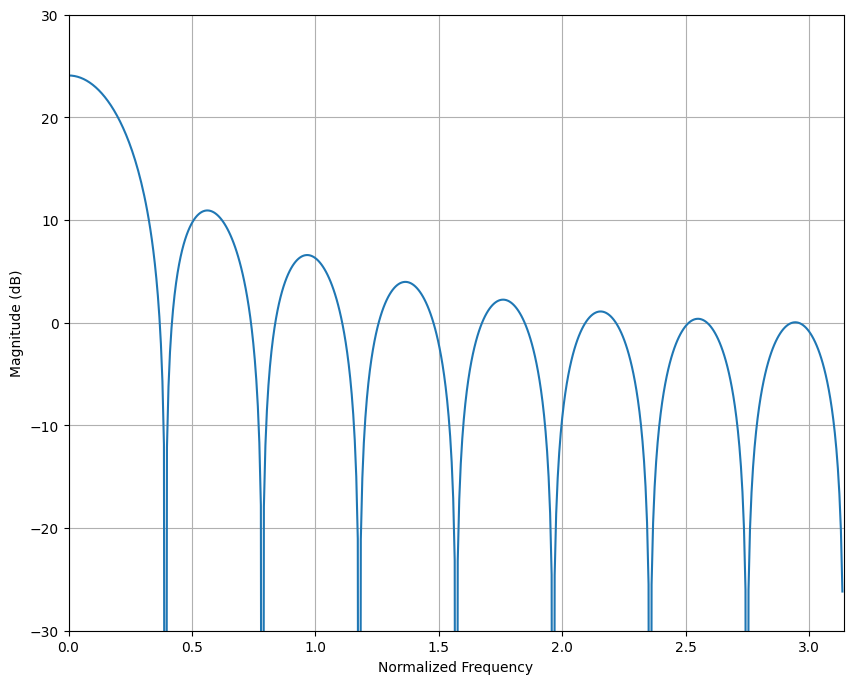

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16)
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

Amati: Lobus utamanya memiliki lebar sekitar 3dB 0,05π ​≈ 0,16, redaman lobus samping sekitar -15 hingga -25 dB.
Kita dapat mendesain jendela yang berbeda, yang tidak menekankan daerah transisi dari passband ke stopband, dan lebih menekankan redaman stopband daripada redaman passband.

Hal ini dapat dilihat sebagai meminimalkan fungsi kesalahan kuadrat tertimbang , dimana bagian yang ingin kita tekankan mendapat bobot lebih tinggi.

Dengan Python kita dapat merumuskan fungsi kesalahan dengan kesalahan kuadrat tertimbang sebagai berikut, dengan pb, tb: jumlah sampel frekuensi masing-masing di pita sandi dan pita transisi,

In [12]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512
    
    #desired passband:
    pb=int(numfreqsamples/4.0)
    #desired transition band:
    tb=int(numfreqsamples/8.0)
    
    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

# View H Desired and Weights

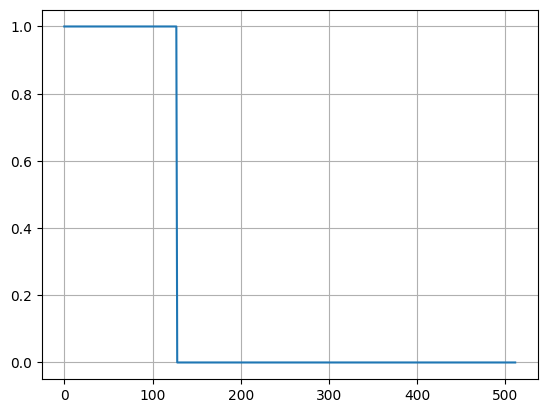

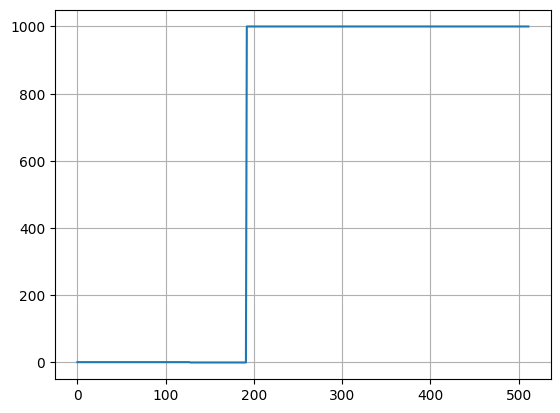

In [13]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512
    
#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

Kami kemudian dapat menerapkan optimasi untuk mendapatkan contoh jendela atau filter yang meminimalkan kesalahan ini, misalnya menggunakan “scipy.optimize”. Dalam contoh ini jendela atau filter h (tergantung cara penggunaannya) dengan panjang 16 sampel atau tap diperoleh dengan:

In [14]:
import scipy.optimize as opt

minout=opt.minimize(errfunc,np.random.rand(16))
h=minout.x
print(h)

[ 7.80681300e-05 -1.10528039e-04 -1.48982150e-03 -5.51082081e-03
 -1.33570792e-02 -2.48383818e-02 -3.77184795e-02 -4.83755495e-02
 -5.31408918e-02 -5.03184625e-02 -4.09508252e-02 -2.83335333e-02
 -1.62708556e-02 -7.39752908e-03 -2.40360806e-03 -4.39236458e-04]


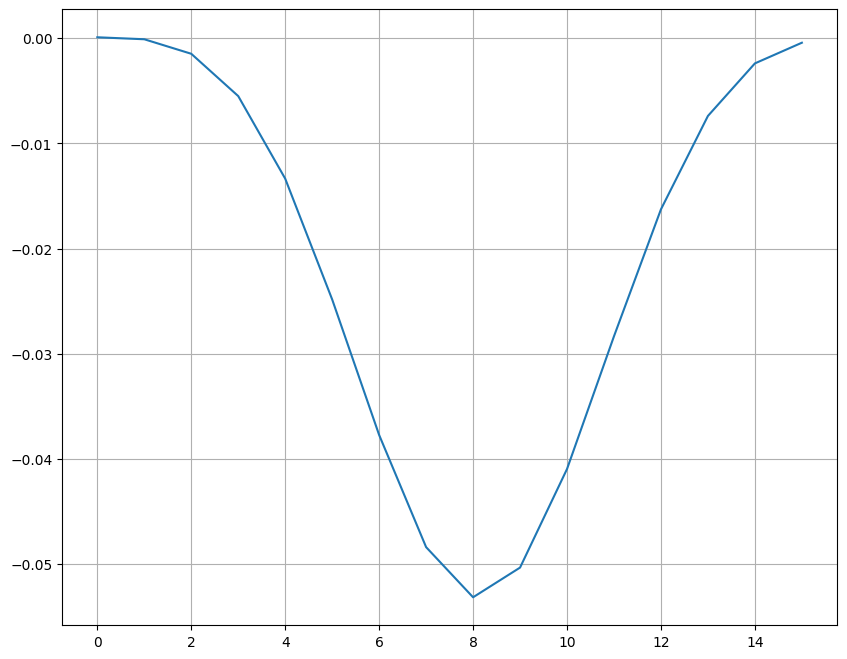

In [15]:
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Perhatikan: tanda negatif tidak menjadi masalah, karena kita hanya mengoptimalkan besarannya. Besarnya respons frekuensi adalah,

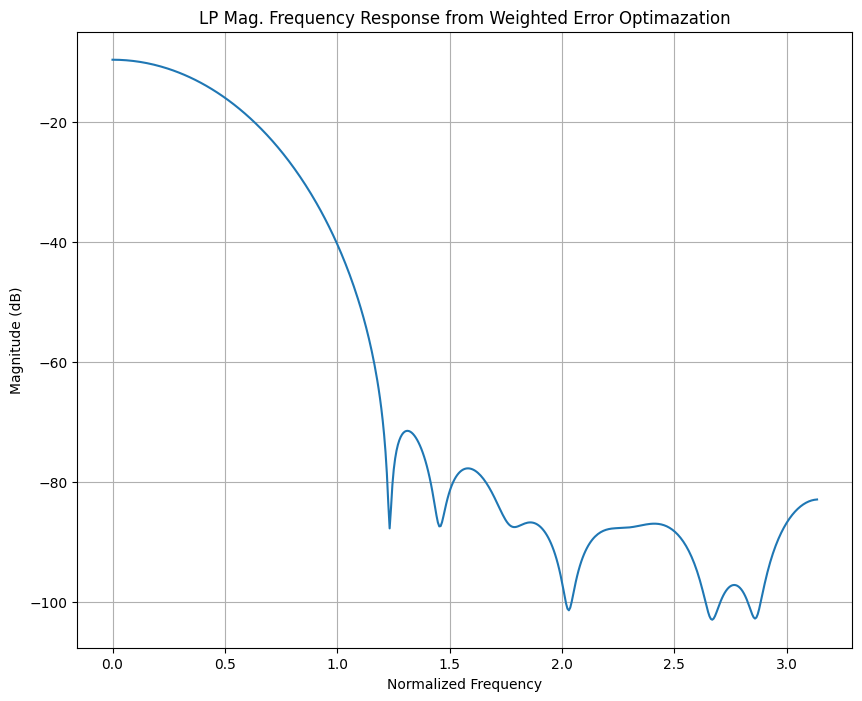

In [16]:
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation')
plt.grid()

Amati redaman stopband yang cukup tinggi, sekitar -80 dB!

Biasanya optimasi ini memberikan jawaban terbaik untuk sebagian besar aplikasi. Namun ada juga lebih banyak jendela “pra-fabrikasi” untuk desain filter, dengan trade-off berbeda pada lebar pita transisi dan redaman stopband, demi kenyamanan.

# Raise Cosine Window (Hann- or Hanning Window)

Yang pertama adalah jendela kosinus timbul , juga dikenal sebagai Jendela Hann- atau Hanning :

# 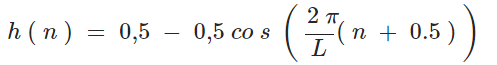

,dengan n=0,…,L-1, untuk panjang jendela genap.

Contoh cosinus yang ditinggikan dengan panjang jendela genap dan L=16: Kita memperoleh plotnya dengan:

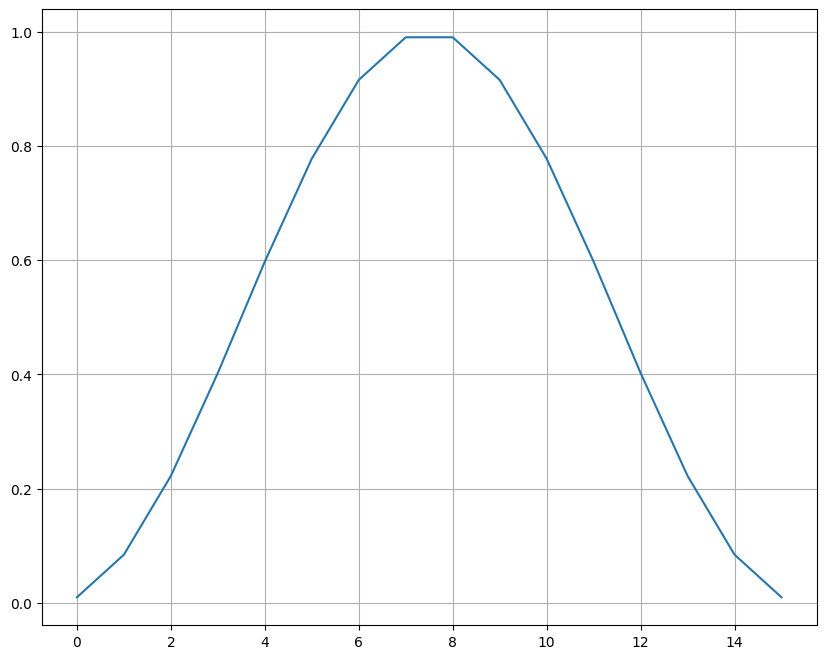

In [17]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

In [19]:
def freqz(x):
    # get frequency bins and according magnitude values 
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi 

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

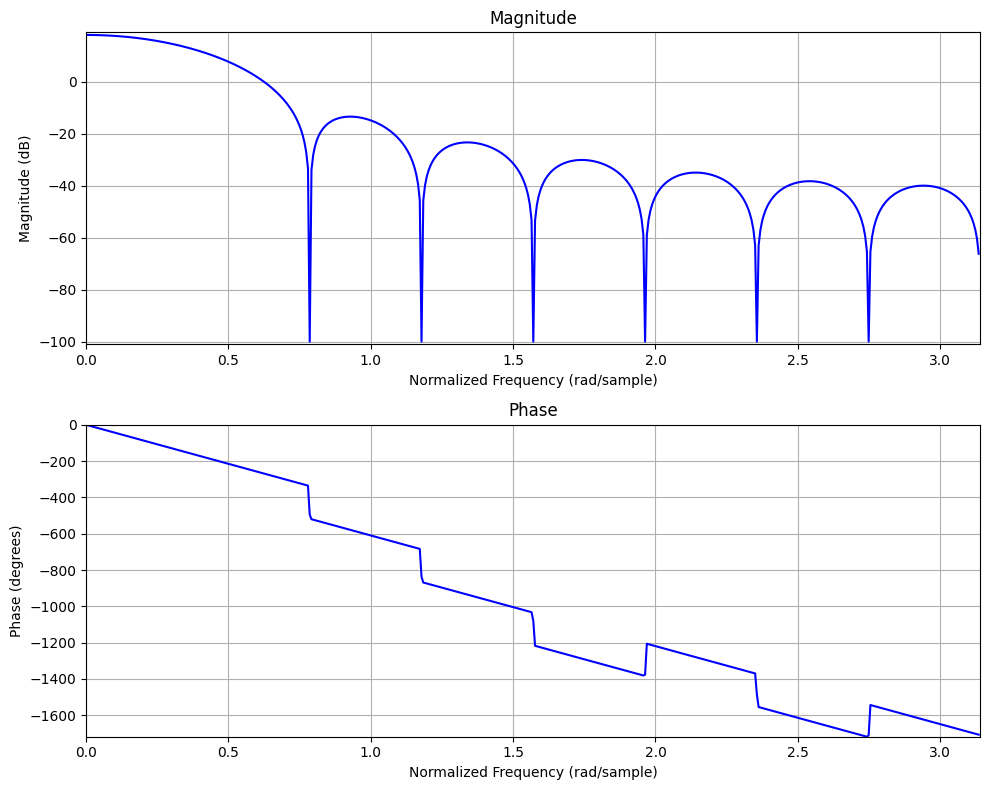

In [20]:
freqz(h)

Di sini kita dapat melihat bahwa kita memperoleh redaman yang jauh lebih tinggi (dibandingkan dengan fungsi persegi panjang) untuk side lobe pertama, lebih dari -35 dB (diukur dari maksimum lobe utama, pass band), dan jauh di stop band kita mendapatkan redaman sekitar -60 dB!

Namun dengan mengorbankan main lobe yang lebih lebar (lebarnya sekitar 3dB 0,1π​, dua kali lebih lebar dari jendela persegi panjang), sehingga menghasilkan pita transisi yang lebih lebar.

Hal ini menunjukkan trade-off umum: Kita dapat menukar lebar transisi dengan redaman stop-band.

Untuk panjang jendela ganjil kita peroleh :

# 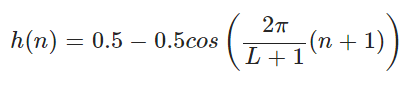
, dengan n=0,…,L-1.

Contoh untuk L=17 (jumlah sampel respon impuls, sama dengan koefisien, karena ini mewakili filter FIR):

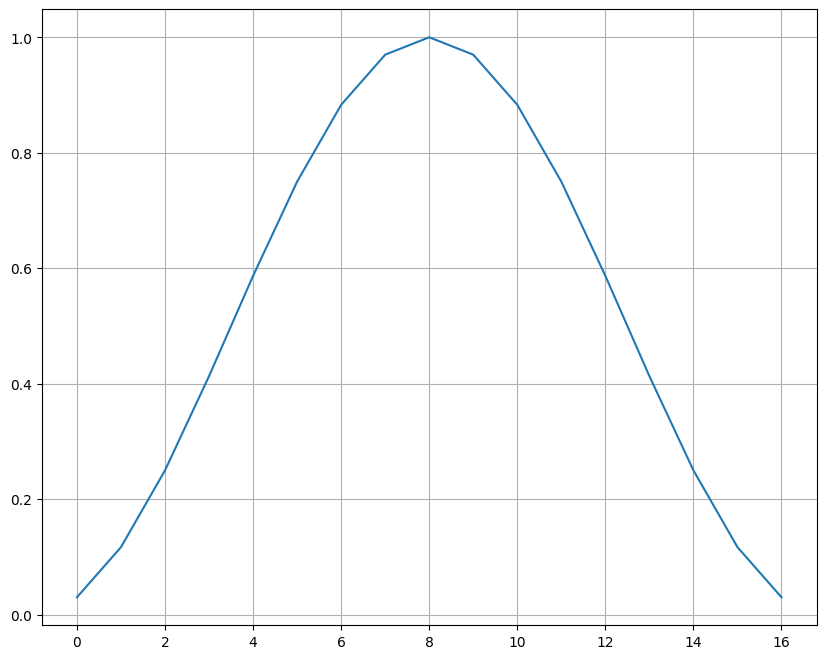

In [21]:
h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Amati: Di ​​sini pusatnya tepat pada satu sampel!

Untuk jendela Sine kita mendapatkan:
# 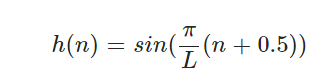

,dengan n=0,…,L-1 untuk panjang jendela genap L, atau
# 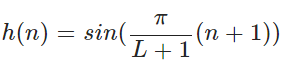
,dengan n=0,…,L-1 untuk panjang jendela ganjil L.

Contoh untuk L=16:

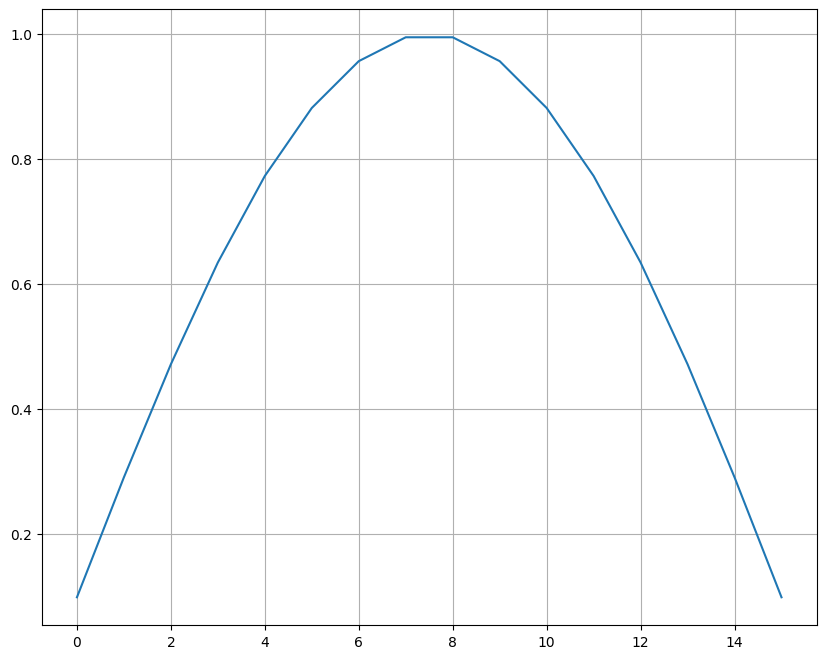

In [22]:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(s)
plt.grid()

Respon frekuensinya adalah:

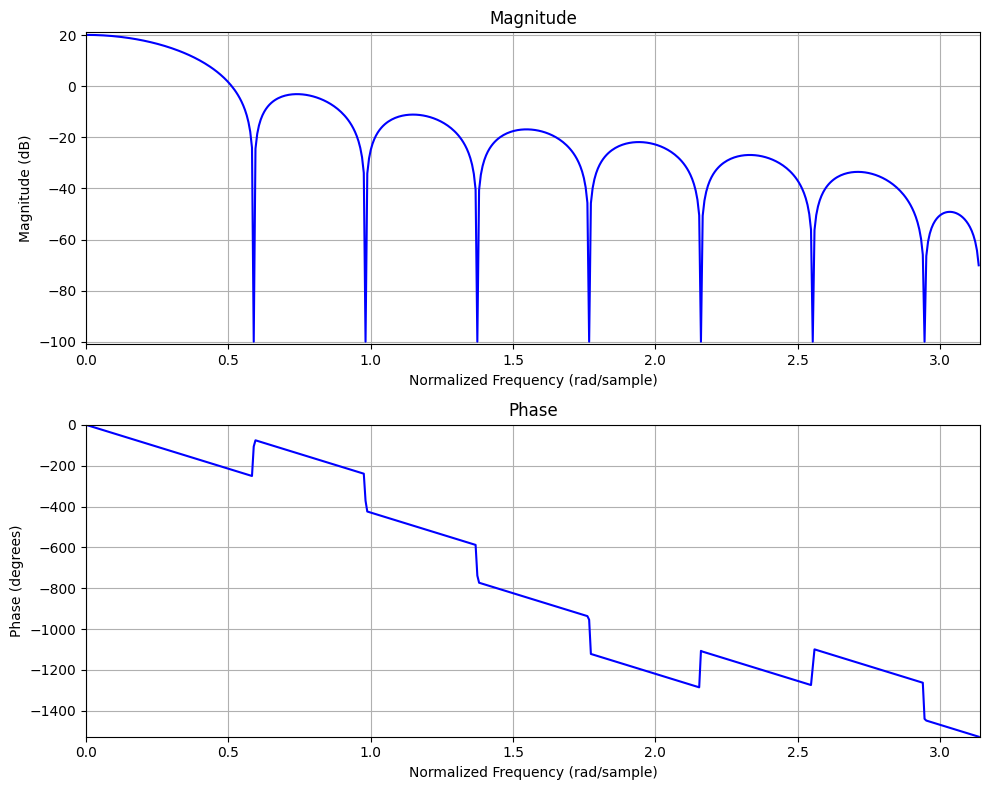

In [23]:
freqz(s)

Di sini kita dapat melihat bahwa lobus utama agak lebih sempit daripada jendela kosinus yang ditinggikan, dengan lebar sekitar 3dB 0,04π​ , tetapi side lobe pertama hanya memiliki redaman sekitar -20 dB. Namun lobus samping selanjutnya meningkat dalam atenuasi. Atenuasi ini lebih besar dibandingkan dengan jendela persegi panjang, namun lebih kecil dibandingkan dengan jendela cosinus yang ditinggikan . Di sisi lain, bandwidth transisinya lebih kecil dibandingkan jendela kosinus yang ditinggikan.

Perhatikan bahwa ini selalu menghasilkan nilai positif untuk fungsi jendela, dan simetris sempurna (untuk panjang ganjil ada sampel tepat di tengah, untuk jendela panjang genap pusatnya berada tepat di antara 2 sampel tengah).

# Kaiser Window

Yang terkenal juga disebut Kaiser Window:

# 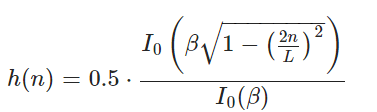
, untuk∣ n ∣ ≤ L / 2
(representasi non-kausal) yang menggunakan fungsi Bessel,
# 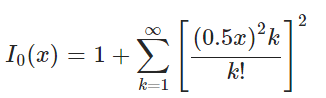
dimana dalam desain praktis sering kali 20 istilah pertama digunakan (Strang, Nguyen, “Wavelets dan Filter Banks”). Parameternyaβ
digunakan untuk menukar bandwidth transisi filter dan redaman stopbandnya.

Contoh untuk L=16 dan β= 2, dengan iPython:

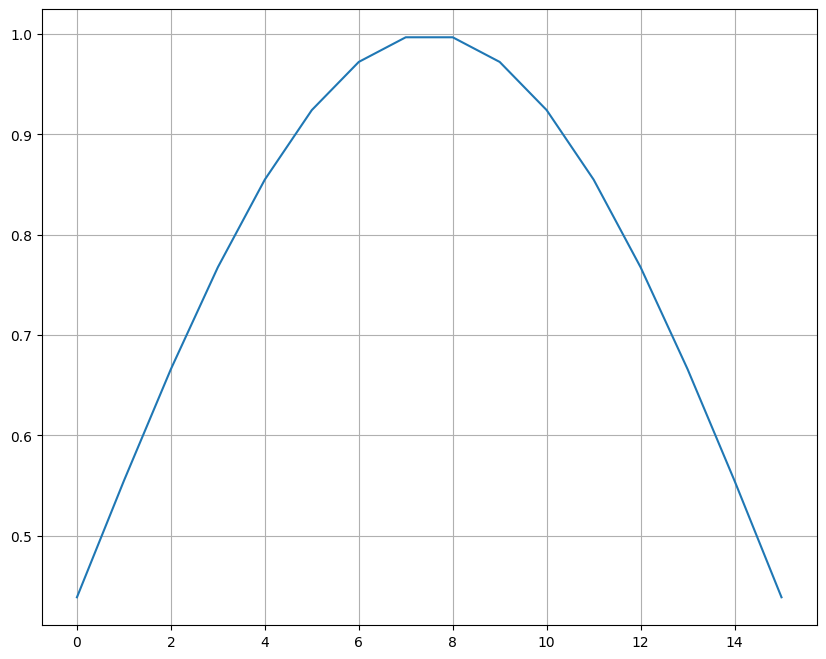

In [24]:
hk=np.kaiser(16,2)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Berikut respon frekuensinya :

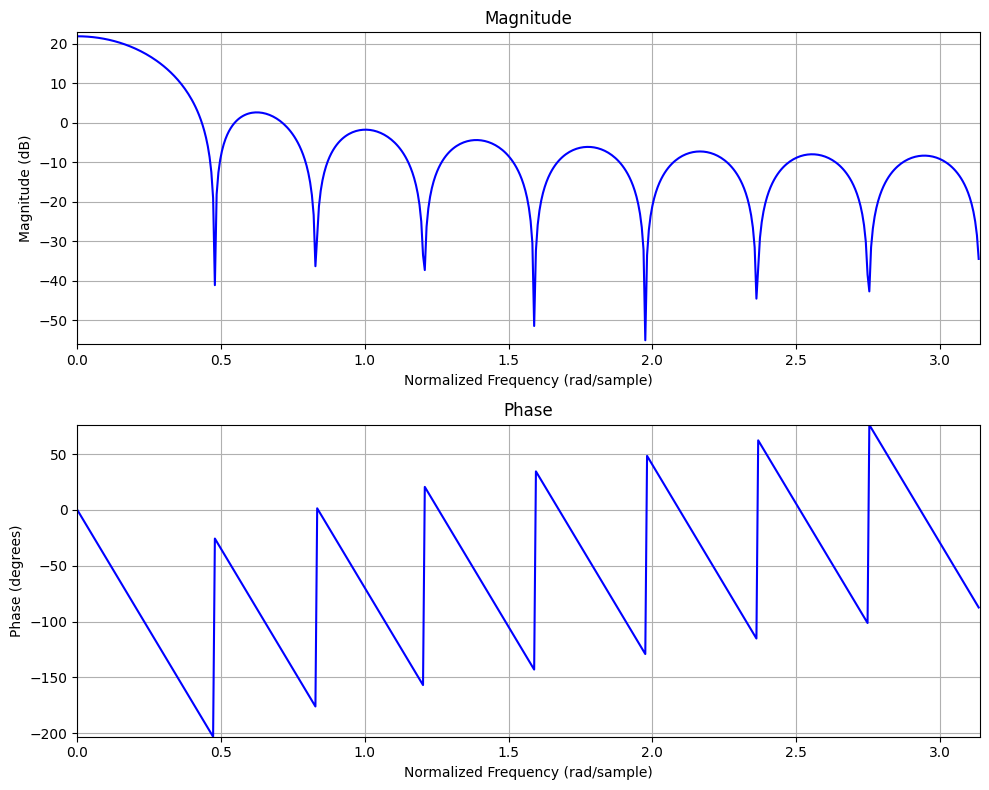

In [25]:
freqz(hk)

Di sini kita dapat melihat lobus utama (pass band dan transisi band), untuk ini β , bahkan lebih sempit dibandingkan jendela sinus, lobus samping pertama juga memiliki redaman sekitar -20 dB, namun lobus samping selanjutnya tidak mengalami peningkatan redaman yang banyak.

Untuk β= 8 kami memperoleh:

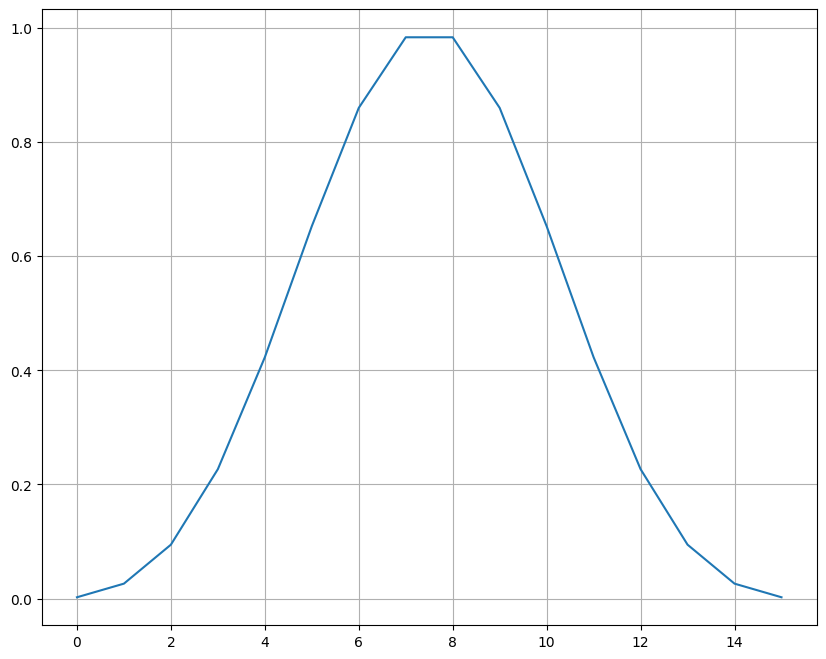

In [26]:
hk=np.kaiser(16,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Di sini kita sekarang dapat melihat ekstrem lainnya, dengan lobus utama yang sangat lebar (pita lintasan dan transisi), tetapi lobus sisi pertama dengan redaman sekitar -60 dB, yang akan memenuhi persyaratan kita!